In [1]:
import re
import string
from collections import defaultdict
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import Counter
import json
import dill
import random
from utils import split_into_sentences


In [2]:
paragraph = "Python is amazing. It is versatile! Do you like Python?"
result = split_into_sentences(paragraph)
print(result)

['Python is amazing.', 'It is versatile!', 'Do you like Python?']


In [2]:
#Loại bỏ các dấu câu
def remove_punctuation(text):
  return "".join([char for char in text if char not in string.punctuation])

In [6]:
sentence = "Kiểm tra thử loại bỏ các dấu câu!!! Ngày mai, trời lại sáng"
remove_punctuation(sentence)

'Kiểm tra thử loại bỏ các dấu câu Ngày mai trời lại sáng'

In [3]:
def remove_punctuation_corpus(corpus):
  corpus_process = []
  for sentence in tqdm(corpus):
    corpus_process.append(remove_punctuation(sentence))
  return corpus_process

In [4]:
def remove_diacritic(text):
    """Hàm loại bỏ dấu tiếng Việt"""
    DIACRITIC_MAP = {
        "áàảãạăắằẳẵặâấầẩẫậ": "a",
        "ÁÀẢÃẠĂẮẰẲẴẶÂẤẦẨẪẬ": "A",
        "éèẻẽẹêếềểễệ": "e",
        "ÉÈẺẼẸÊẾỀỂỄỆ": "E",
        "íìỉĩị": "i",
        "ÍÌỈĨỊ": "I",
        "óòỏõọôốồổỗộơớờởỡợ": "o",
        "ÓÒỎÕỌÔỐỒỔỖỘƠỚỜỞỠỢ": "O",
        "úùủũụưứừửữự": "u",
        "ÚÙỦŨỤƯỨỪỬỮỰ": "U",
        "ýỳỷỹỵ": "y",
        "ÝỲỶỸỴ": "Y",
        "đ": "d",
        "Đ": "D",
    }
    for accents, char in DIACRITIC_MAP.items():
        text = re.sub(f"[{accents}]", char, text)
    return text

In [5]:
file_path = 'train_ipt_500k.pkl'
with open(file_path, 'rb') as f:
    train_ipt_500k = pickle.load(f)

In [12]:
train_ipt_500k[:10]

['Trang Chính\n',
 'Internet Society\n',
 'Internet Society hay ISOC là một tổ chức quốc tế hoạt động phi lợi nhuận, phi chính phủ và bao gồm các thành viên có trình độ chuyên ngành. Tổ chức này chú trọng đến: tiêu chuẩn, giáo dục và các vấn đề về chính sách. Với trên 145 tổ chức thành viên và 65.000 thành viên cá nhân, ISOC bao gồm những con người cụ thể trong cộng đồng Internet. Mọi chi tiết có thể tìm thấy tại website của ISOC.\n',
 'Internet Society nằm ở gần thủ đô Washington, DC, Hoa Kỳ và Geneva, Thụy Sĩ. Số hội viên của nó bao gồm hơn 145 tổ chức thành viên và hơn 65.000 cá nhân. Thành viên còn có thể tự lập một chi nhánh của tổ chức tùy theo vị trí hoặc sở thích. Hiện nay tổ chức có tới 90 chi nhánh trên toàn thế giới.\n',
 'Bảo đảm, cổ vũ cho sự phát triển, mở rộng và sử dụng Internet được thuận lợi nhất cho mọi người trên toàn thế giới.\n',
 'Tiếng Việt\n',
 'Tiếng Việt được chính thức ghi nhận trong Hiến pháp nước Cộng hòa xã hội chủ nghĩa Việt Nam 2013, tại Chương I Điều 5

In [6]:
dataset = train_ipt_500k[:5678]
sentences_data = [sent for sentence in dataset for sent in split_into_sentences(sentence)]
#remove_punctuation_corpus(dataset)
print(sentences_data[:10])


['Trang Chính', 'Internet Society', 'Internet Society hay ISOC là một tổ chức quốc tế hoạt động phi lợi nhuận, phi chính phủ và bao gồm các thành viên có trình độ chuyên ngành.', 'Tổ chức này chú trọng đến: tiêu chuẩn, giáo dục và các vấn đề về chính sách.', 'Với trên 145 tổ chức thành viên và 65.000 thành viên cá nhân, ISOC bao gồm những con người cụ thể trong cộng đồng Internet.', 'Mọi chi tiết có thể tìm thấy tại website của ISOC.', 'Internet Society nằm ở gần thủ đô Washington, DC, Hoa Kỳ và Geneva, Thụy Sĩ.', 'Số hội viên của nó bao gồm hơn 145 tổ chức thành viên và hơn 65.000 cá nhân.', 'Thành viên còn có thể tự lập một chi nhánh của tổ chức tùy theo vị trí hoặc sở thích.', 'Hiện nay tổ chức có tới 90 chi nhánh trên toàn thế giới.']


In [14]:
print(len(sentences_data))

17850


In [16]:
sentences_data_length = [len(sentence) for sentence in sentences_data]
lengths_counts = Counter(sentences_data_length)

In [17]:
print(f"Tổng số lượng câu là: {len(sentences_data)}")
print(f"Độ dài trung bình của các câu: {sum(sentences_data_length) / len(sentences_data)}")
print(f"Độ dài câu dài nhất: {max(sentences_data_length)}")
print(f"Độ dài câu ngắn nhất: {min(sentences_data_length)}")
most_common_length, frequency_max = lengths_counts.most_common(1)[0]
print(f"Độ dài câu xuất hiện nhiều nhất: {frequency_max}")
least_common_length, frequency_min = lengths_counts.most_common()[-1]
print(f"Độ dài câu xuất hiện ít nhất: {frequency_min}")

Tổng số lượng câu là: 17850
Độ dài trung bình của các câu: 138.46935574229693
Độ dài câu dài nhất: 896
Độ dài câu ngắn nhất: 1
Độ dài câu xuất hiện nhiều nhất: 128
Độ dài câu xuất hiện ít nhất: 1


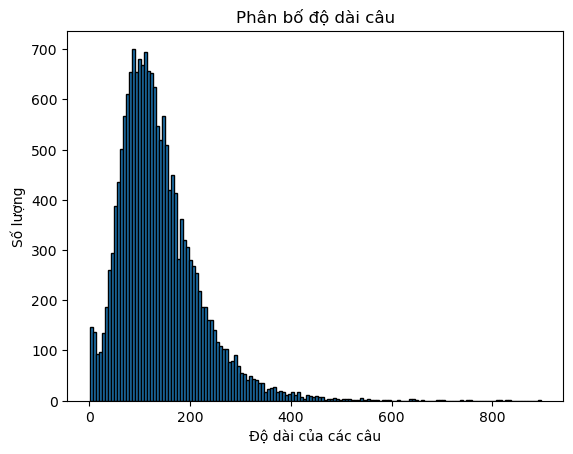

In [18]:
plt.hist(sentences_data_length, bins = 150, edgecolor = "black")
plt.title("Phân bố độ dài câu")
plt.xlabel("Độ dài của các câu")
plt.ylabel("Số lượng")
plt.show()

In [19]:
sentences_data_new = [sentences_data[i] for i in range(len(sentences_data)) if len(sentences_data[i]) < 400]
print(f"Số phần tử của tập dữ liệu: {len(sentences_data_new)}")
sentences_data_length_new = [len(sentence) for sentence in sentences_data_new]

Số phần tử của tập dữ liệu: 17662


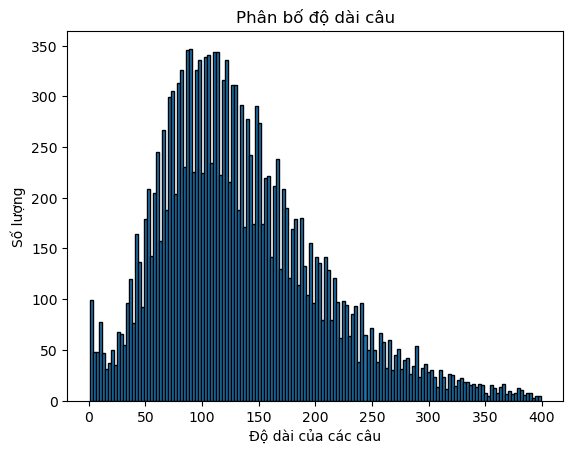

In [20]:
plt.hist(sentences_data_length_new, bins = 150, edgecolor = "black")
plt.title("Phân bố độ dài câu")
plt.xlabel("Độ dài của các câu")
plt.ylabel("Số lượng")
plt.show()

In [8]:
def compute_probabilities(dataset, windows = 3):
  count_arrivals = defaultdict(lambda : defaultdict(int))
  for sentence in tqdm(dataset):
    words = sentence.split()
    if len(words) < 3: continue
    for i in range(0, len(words) - 2):
      no_diacritic = remove_diacritic(" ".join(words[i : i + 3]))
      count_arrivals[no_diacritic][" ".join(words[i : i + 3])] += 1
  count_prob = {k : {k2 : v2 / sum(v.values()) for k2, v2 in v.items()} for k, v in count_arrivals.items()}
  return count_prob

In [22]:
count_prob = compute_probabilities(sentences_data)

100%|██████████| 17850/17850 [00:07<00:00, 2547.87it/s]


In [23]:
count_prob

{'Internet Society hay': {'Internet Society hay': 1.0},
 'Society hay ISOC': {'Society hay ISOC': 1.0},
 'hay ISOC la': {'hay ISOC là': 1.0},
 'ISOC la mot': {'ISOC là một': 1.0},
 'la mot to': {'là một tổ': 0.875, 'là một tô': 0.125},
 'mot to chuc': {'một tổ chức': 1.0},
 'to chuc quoc': {'tổ chức quốc': 1.0},
 'chuc quoc te': {'chức quốc tế': 1.0},
 'quoc te hoat': {'quốc tế hoạt': 1.0},
 'te hoat dong': {'tế hoạt động': 1.0},
 'hoat dong phi': {'hoạt động phi': 1.0},
 'dong phi loi': {'động phi lợi': 1.0},
 'phi loi nhuan,': {'phi lợi nhuận,': 1.0},
 'loi nhuan, phi': {'lợi nhuận, phi': 1.0},
 'nhuan, phi chinh': {'nhuận, phi chính': 1.0},
 'phi chinh phu': {'phi chính phủ': 1.0},
 'chinh phu va': {'chính phủ và': 1.0},
 'phu va bao': {'phủ và bao': 1.0},
 'va bao gom': {'và bao gồm': 1.0},
 'bao gom cac': {'bao gồm các': 1.0},
 'gom cac thanh': {'gồm các thành': 0.6666666666666666,
  'gồm các thanh': 0.3333333333333333},
 'cac thanh vien': {'các thành viên': 1.0},
 'thanh vien co'

In [24]:
path = r'D:\Tài liệu học đại học\Project1\Project-1\dictionary.dill' 
with open(path, 'wb') as f:
    dill.dump(count_prob, f)

In [24]:
def find_solution(obs, count_prob):
  T = len(obs)
  if T < 3:
    return [obs]
  result = []
  for i in range(0, T - 2, 3):
    no_diacritic = " ".join(obs[i : i + 3])
    if no_diacritic not in count_prob:
      result.append(no_diacritic)
      continue  
    dic = count_prob[no_diacritic]
    max_key = max(dic, key=dic.get)
    result.append(max_key)
  if len(obs) % 3 == 1:
      no_diacritic = obs[len(obs) - 1]
      if no_diacritic not in count_prob:
        result.append(no_diacritic)
      else:
          dic = count_prob[no_diacritic]
          max_key = max(dic, key=dic.get)
          result.append(max_key)
  elif len(obs) % 3 == 2:
      no_diacritic = " ".join(obs[len(obs) - 2 : len(obs)])
      if no_diacritic not in count_prob:
         result.append(no_diacritic)
      else:
          dic = count_prob[no_diacritic]
          max_key = max(dic, key=dic.get)
          result.append(max_key)
  return result

In [26]:
count_prob = {}
path = r'D:\Tài liệu học đại học\Project1\Project-1\dictionary.dill' 
with open(path, 'rb') as f3:
    count_prob = dill.load(f3)

In [27]:
test = "ISOC la mot to chuc quoc te hoat dong phi loi nhuan, phi"

In [28]:
print(" ".join(find_solution(test.split(" "), count_prob)))

ISOC là một tổ chức quốc tế hoạt động phi lợi nhuận, phi


In [18]:
random.seed(42)
test_data_2_result = random.sample(sentences_data, 1000)

In [19]:
test_data_2_result[:5]

['Rồi lại phải qua dãy núi lèn (đá không phá đất), đá đứng như tường, ở giữa có đường đi rất hiểm: đó là ải Giáp Khẩu, tức là ải Chi Lăng, ở phía bắc huyện Hữu Lũng thuộc Lạng Sơn ngày nay.',
 'Thành phố Hồ Chí Minh còn là một trung tâm mua sắm và giải trí.',
 'Trong 11 tháng đầu năm 2012, thành phố Huế đã nhận được 2,4 triệu lượt khách du lịch, tăng 24,6% so với cùng kỳ năm 2011.',
 'Bảng xếp hạng 100 phim Anh Quốc của BFI có "Monty Python\'s Life of Brian" (1979), phim này thường được công chúng Anh Quốc bình chọn là hài hước nhất mọi thời đại.',
 'Xấp xỉ 92% dân số toàn tỉnh cư trú trên đảo Newfoundland (cùng các đảo nhỏ xung quanh), trong đó hơn một nửa cư trú tại bán đảo Avalon.']

In [20]:
test_data_2 = [remove_diacritic(test_data_no_diacritic) for test_data_no_diacritic in test_data_2_result]
test_data_2[:5]

['Roi lai phai qua day nui len (da khong pha dat), da dung nhu tuong, o giua co duong di rat hiem: do la ai Giap Khau, tuc la ai Chi Lang, o phia bac huyen Huu Lung thuoc Lang Son ngay nay.',
 'Thanh pho Ho Chi Minh con la mot trung tam mua sam va giai tri.',
 'Trong 11 thang dau nam 2012, thanh pho Hue da nhan duoc 2,4 trieu luot khach du lich, tang 24,6% so voi cung ky nam 2011.',
 'Bang xep hang 100 phim Anh Quoc cua BFI co "Monty Python\'s Life of Brian" (1979), phim nay thuong duoc cong chung Anh Quoc binh chon la hai huoc nhat moi thoi dai.',
 'Xap xi 92% dan so toan tinh cu tru tren dao Newfoundland (cung cac dao nho xung quanh), trong do hon mot nua cu tru tai ban dao Avalon.']

In [27]:
def compare_words(sentence1, sentence2):
    words1 = sentence1.split()
    words2 = sentence2.split()
    same = 0
    for i in range(len(words1)):
        if words1[i] == words2[i]:
            same += 1
    similarity_prob = (same / len(words1)) * 100
    return similarity_prob

In [28]:
similarity_prob = 0
similarity_prob_list = []
for i in range(len(test_data_2)):
    test_data_diacritic = " ".join(map(str, find_solution(test_data_2[i].split(), count_prob)))
    similarity_prob += compare_words(test_data_diacritic, test_data_2_result[i]) / len(test_data_2)
    similarity_prob_list.append(compare_words(test_data_diacritic, test_data_2_result[i]))


In [29]:
similarity_prob

94.60555766139619

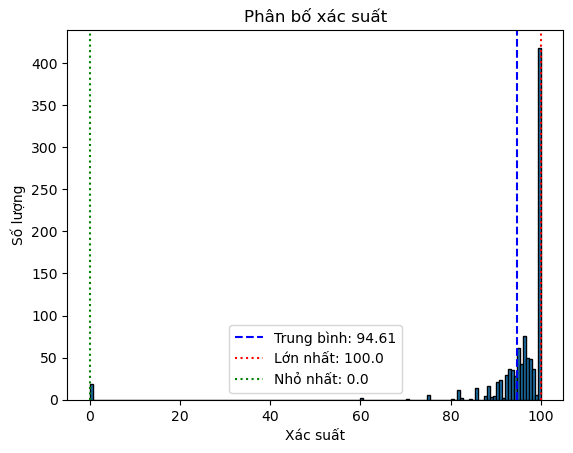

In [37]:
plt.hist(similarity_prob_list, bins = 150, edgecolor = "black")
plt.title("Phân bố xác suất")
plt.xlabel("Xác suất")
plt.ylabel("Số lượng")
plt.axvline(similarity_prob, color='blue', linestyle='dashed', linewidth=1.5, label=f'Trung bình: {similarity_prob:.2f}')
plt.axvline(max(similarity_prob_list), color='red', linestyle='dotted', linewidth=1.5, label=f'Lớn nhất: {max(similarity_prob_list)}')
plt.axvline(min(similarity_prob_list), color='green', linestyle='dotted', linewidth=1.5, label=f'Nhỏ nhất: {min(similarity_prob_list)}')
plt.legend()
plt.savefig(r"D:\Tài liệu học đại học\Project1\Project-1\images\result_dictionary_pic5678.png", format="png", dpi=300)
plt.show()

In [40]:
count_prob2 = {}
path = r'D:\Tài liệu học đại học\Project1\Project-1\dictionary2.dill' 
with open(path, 'rb') as f2:
    count_prob2 = dill.load(f2)

In [15]:
random.seed(42)
test_data_1_result = random.sample(train_ipt_500k[223774:], 2000)

In [16]:
test_data_1 = [remove_diacritic(test_data_no_diacritic) for test_data_no_diacritic in test_data_1_result]
test_data_1[:5]

['Su tai thiet san bay van tiep tuc de nang cap trang thiet bi. Hang Iraqi Airways da chon san bay nay la trung tam hoat dong thu hai.\n',
 'duoc su dung rong rai.\n',
 'Cuoi cung, nhung bien phap tren day cung chi la nhung loi khuyen chung nhat. Cot loi cua van de la bo me phai lam sao tao duoc mot moi truong tin cay lan nhau, quan tam den con cai va di nhien, "chi co trai tim nhay cam cua nguoi me moi nhan thay duoc nhung gi bat thuong du la rat nho o dua con yeu quy cua minh".\n',
 'Francisco va Jacinta Marto bi chet som trong dot dich cum Tay Ban Nha, Francisco chet nam 1919, Jacinta chet nam 1920. Ca hai em da duoc giao hoang Gioan Phaolo II nang len hang dang ton kinh (venerable) ngay 13.5.1989, duoc phong chan phuoc ngay 13.5.2000. Va vao thu Bay 13-5-2017, giao hoang Phanxico da chu su thanh le trong the ton phong len bac hien thanh 2 chan phuoc thieu nhi. Mo cua 2 em hien nam trong long Vuong cung thanh duong Fatima.\n',
 'formula_57 la tap dong trong formula_45 neu formula_64

In [43]:
similarity_prob1 = 0
similarity_prob_list1 = []
for i in range(len(test_data_1)):
    test_data_diacritic = " ".join(map(str, find_solution(test_data_1[i].split(), count_prob)))
    similarity_prob1 += compare_words(test_data_diacritic, test_data_1_result[i]) / len(test_data_1)
    similarity_prob_list1.append(compare_words(test_data_diacritic, test_data_1_result[i]))


In [44]:
similarity_prob1

37.02491668564333

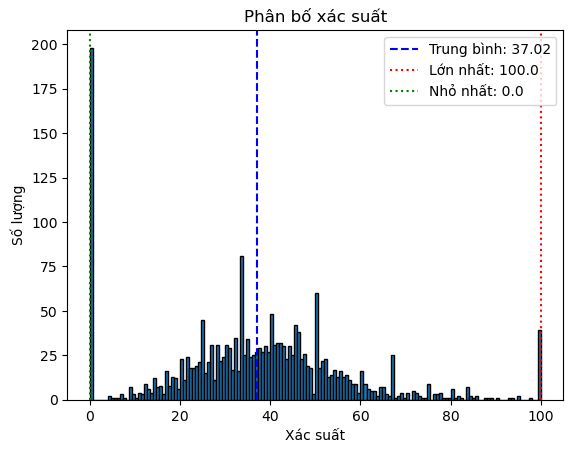

In [45]:
plt.hist(similarity_prob_list1, bins = 150, edgecolor = "black")
plt.title("Phân bố xác suất")
plt.xlabel("Xác suất")
plt.ylabel("Số lượng")
plt.axvline(similarity_prob1, color='blue', linestyle='dashed', linewidth=1.5, label=f'Trung bình: {similarity_prob1:.2f}')
plt.axvline(max(similarity_prob_list1), color='red', linestyle='dotted', linewidth=1.5, label=f'Lớn nhất: {max(similarity_prob_list1)}')
plt.axvline(min(similarity_prob_list1), color='green', linestyle='dotted', linewidth=1.5, label=f'Nhỏ nhất: {min(similarity_prob_list1)}')
plt.legend()
plt.savefig(r"D:\Tài liệu học đại học\Project1\Project-1\images\result_1_dictionary_pic5678.png", format="png", dpi=300)
plt.show()

In [50]:
similarity_prob3 = 0
similarity_prob_list3 = []
for i in range(len(test_data_2)):
    test_data_diacritic = " ".join(map(str, find_solution(test_data_2[i].split(), count_prob2)))
    similarity_prob3 += compare_words(test_data_diacritic, test_data_2_result[i]) / len(test_data_2)
    similarity_prob_list3.append(compare_words(test_data_diacritic, test_data_2_result[i]))


In [51]:
similarity_prob3

93.9946528886694

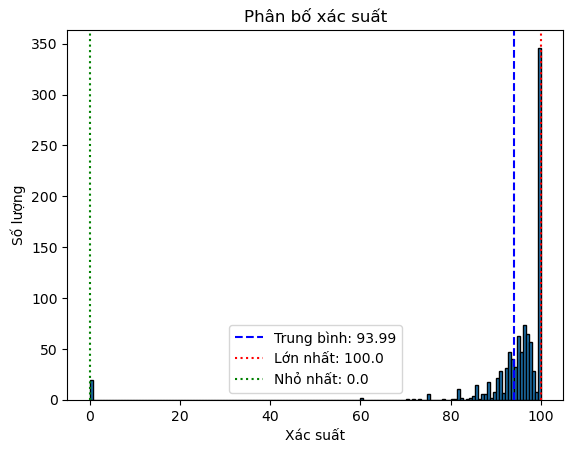

In [52]:
plt.hist(similarity_prob_list3, bins = 150, edgecolor = "black")
plt.title("Phân bố xác suất")
plt.xlabel("Xác suất")
plt.ylabel("Số lượng")
plt.axvline(similarity_prob3, color='blue', linestyle='dashed', linewidth=1.5, label=f'Trung bình: {similarity_prob3:.2f}')
plt.axvline(max(similarity_prob_list3), color='red', linestyle='dotted', linewidth=1.5, label=f'Lớn nhất: {max(similarity_prob_list3)}')
plt.axvline(min(similarity_prob_list3), color='green', linestyle='dotted', linewidth=1.5, label=f'Nhỏ nhất: {min(similarity_prob_list)}')
plt.legend()
plt.savefig(r"D:\Tài liệu học đại học\Project1\Project-1\images\result_dictionary_pic223774.png", format="png", dpi=300)
plt.show()

In [47]:
similarity_prob2 = 0
similarity_prob_list2 = []
for i in range(len(test_data_1)):
    test_data_diacritic = " ".join(map(str, find_solution(test_data_1[i].split(), count_prob2)))
    similarity_prob2 += compare_words(test_data_diacritic, test_data_1_result[i]) / len(test_data_1)
    similarity_prob_list2.append(compare_words(test_data_diacritic, test_data_1_result[i]))

In [48]:
similarity_prob2

59.09684929655249

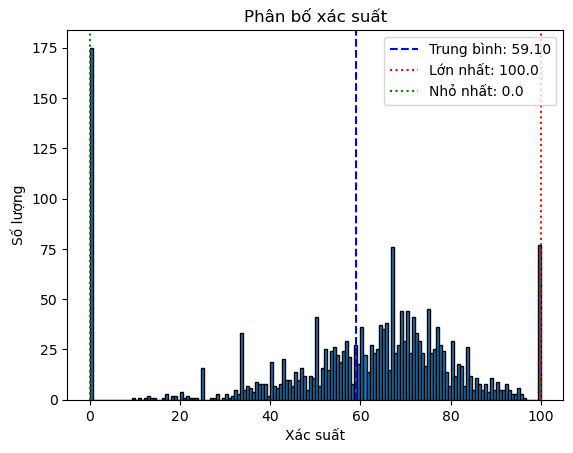

In [49]:
plt.hist(similarity_prob_list2, bins = 150, edgecolor = "black")
plt.title("Phân bố xác suất")
plt.xlabel("Xác suất")
plt.ylabel("Số lượng")
plt.axvline(similarity_prob2, color='blue', linestyle='dashed', linewidth=1.5, label=f'Trung bình: {similarity_prob2:.2f}')
plt.axvline(max(similarity_prob_list2), color='red', linestyle='dotted', linewidth=1.5, label=f'Lớn nhất: {max(similarity_prob_list2)}')
plt.axvline(min(similarity_prob_list2), color='green', linestyle='dotted', linewidth=1.5, label=f'Nhỏ nhất: {min(similarity_prob_list2)}')
plt.legend()
plt.savefig(r"D:\Tài liệu học đại học\Project1\Project-1\images\result_1_dictionary_pic223774.png", format="png", dpi=300)
plt.show()

In [9]:
count_prob1 = compute_probabilities(sentences_data, 1)

100%|██████████| 17850/17850 [00:08<00:00, 2163.77it/s]


In [10]:
path = r'D:\Tài liệu học đại học\Project1\Project-1\dictionary1word.dill' 
with open(path, 'wb') as fa1:
    dill.dump(count_prob1, fa1)

In [11]:
count_prob2 = compute_probabilities(sentences_data, 2)

100%|██████████| 17850/17850 [00:07<00:00, 2480.88it/s]


In [12]:
path = r'D:\Tài liệu học đại học\Project1\Project-1\dictionary2word.dill' 
with open(path, 'wb') as fa2:
    dill.dump(count_prob2, fa2)

In [13]:
def compute_probabilities2(dataset, windows = 3):
  count_arrivals = defaultdict(lambda : defaultdict(int))
  for sentence in tqdm(dataset):
    words = sentence.split()
    if len(words) < 3: continue
    for i in range(0, len(words) - 2):
      no_diacritic = remove_diacritic(" ".join(words[i : i + 3]))
      count_arrivals[no_diacritic][" ".join(words[i : i + 3])] += 1
    
    no_diacritic = remove_diacritic(words[len(words) - 1])
    count_arrivals[no_diacritic][len(words) - 1] += 1
    no_diacritic = remove_diacritic(words[len(words) - 2])
    count_arrivals[no_diacritic][len(words) - 2] += 1
    no_diacritic = remove_diacritic(" ".join(words[len(words) - 2 : len(words)]))
    count_arrivals[no_diacritic][" ".join(words[len(words) - 2 : len(words)])] += 1

  count_prob = {k : {k2 : v2 / sum(v.values()) for k2, v2 in v.items()} for k, v in count_arrivals.items()}
  return count_prob

In [14]:
count_prob3 = compute_probabilities(sentences_data)

100%|██████████| 17850/17850 [00:07<00:00, 2497.46it/s]


In [30]:
similarity_prob4a = 0
similarity_prob_list4a = []
for i in range(len(test_data_2)):
    test_data_diacritic = " ".join(map(str, find_solution(test_data_2[i].split(), count_prob3)))
    similarity_prob4a += compare_words(test_data_diacritic, test_data_2_result[i]) / len(test_data_2)
    similarity_prob_list4a.append(compare_words(test_data_diacritic, test_data_2_result[i]))


In [31]:
similarity_prob4a

94.60555766139619

In [32]:
similarity_prob4b = 0
similarity_prob_list4b = []
for i in range(len(test_data_1)):
    test_data_diacritic = " ".join(map(str, find_solution(test_data_1[i].split(), count_prob3)))
    similarity_prob4b += compare_words(test_data_diacritic, test_data_1_result[i]) / len(test_data_1)
    similarity_prob_list4b.append(compare_words(test_data_diacritic, test_data_1_result[i]))


In [33]:
similarity_prob4b

37.02491668564333